In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import files

In [8]:
### import and read csv file

path = 'Output/full_indicators_by_country.csv'
df = pd.read_csv(path)


df

,index,country,iso3Code,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,0.000000,...,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,20.0,3.294,218.749241
1,1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,...,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,37.0,1.809,197.990096
2,2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,0.000000,...,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,36.0,2.110,94.177289
3,3,American Samoa,ASM,0.000000,0.000000,14.150000,0.000000,0.0,11.422222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000
4,4,Andorra,AND,100.000000,100.000000,39.983452,0.000000,0.0,6.466667,0.000000,...,10.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,0.000000,...,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41.0,1.802,43.300050
199,199,West Bank and Gaza,PSE,0.000000,99.977778,68.829501,0.000000,402.0,29.736444,0.000000,...,0.000000,0.000000,0.000000,30.662889,22.519000,24.193444,25.038000,0.0,2.872,128.246720
200,200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,0.000000,...,0.036667,0.541611,15.049805,0.000000,0.000000,0.000000,17.822111,16.0,3.397,17.149918
201,201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,...,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,37.0,1.948,3.345682


## Inspect the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 52 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   index                                                                                                 203 non-null    int64  
 1   country                                                                                               203 non-null    object 
 2   iso3Code                                                                                              203 non-null    object 
 3   clean fuels for cooking (% of population)                                                             203 non-null    float64
 4   Access to electricity (% of population)                                                               20

In [10]:
df.describe()

,index,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,101.000000,61.681253,84.540394,36.676581,1.040230,1037.241872,19.211691,22.630020,292.324973,-0.052812,...,4.753558,3.196350,9.233506,5.193298,6.648959,6.481303,6.710729,37.182266,1.696631,104.523066
std,58.745213,40.911296,26.359982,22.669960,1.502681,845.406017,10.010777,38.152011,1219.684353,0.985466,...,4.069545,5.106580,12.240198,4.865685,6.824429,5.512370,5.663596,22.798325,0.993109,313.069257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.222222,0.000000,0.000000,-1.819292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.500000,11.344444,82.050000,18.275213,0.206179,324.500000,10.493333,0.000000,113.581446,-0.822233,...,0.779444,0.000000,0.000000,2.169056,1.537556,2.705167,2.912944,23.000000,1.388500,3.422510
50%,101.000000,82.744444,99.744444,38.527215,0.583351,847.000000,16.022667,0.000000,124.388549,-0.232470,...,4.054444,1.192078,4.689504,4.011222,4.887333,5.386889,5.067667,36.000000,1.957000,23.178038
75%,151.500000,100.000000,100.000000,52.313291,1.279990,1613.000000,27.434056,40.770094,159.647858,0.577856,...,7.997222,4.522973,14.558174,6.933667,9.850444,9.135333,9.314222,52.500000,2.293000,65.736551
max,202.000000,100.000000,100.000000,81.080429,13.679517,3240.000000,45.817111,209.829585,12920.702312,2.245200,...,16.863333,35.286391,64.389653,30.662889,35.480000,30.466333,29.187111,90.000000,3.397000,3066.215540


In [39]:
cols=", ".join(df.columns)
print(cols)


index, country, iso3Code, clean fuels for cooking (% of population), Access to electricity (% of population), Agricultural land (% ), Armed forces (% labor force), precipitation (mm per year), Birth rate, crude (per 1,000 people), Central government debt, total (% of GDP), Consumer price index (2010 = 100), Control of Corruption: Estimate, Cost of business start-up (% of GNI per capita), Current account balance (% of GDP), Current health expenditure (% of GDP), Death rate, crude (per 1,000 people), Debt service (PPG and IMF only, % of exports of goods, services and primary income), doing business score, Fertility rate, total (births per woman), % Firms using banks, GDP growth (annual %), GDP per capita (constant 2015 US$), GDP per capita, PPP (constant 2021 international $), GNI per capita (2015 US$), government  consumption exp (% of GDP), Government expenditure on education, total (% of GDP), Human Capital Index, Industry (including construction), value added (% of GDP), Inflation, c

In [36]:
df.shape

(203, 53)

## Logistic Regression on Immigration Data
- Since immigration_100K is a continuous variable, Logistic Regression is typically not suitable (Logistic Regression is for classification problems). 
- However, we can classify countries into high/low immigration categories, and convert the target variable into categories.


### Step 1: Convert immigration_100K into Categories
We can categorize countries into:

- High Immigration (1): immigration_100K > median
- Low Immigration (0): immigration_100K ≤ median

In [13]:
# Convert target into categorical (Binary Classification: High vs Low)
median_value = df['immigration_100k'].median()
df['immigration_category'] = np.where(df['immigration_100k'] > median_value, 1, 0)  # 1 = High, 0 = Low


In [15]:

# Define features and target
X = df.drop(columns=['immigration_100k', 'immigration_category','index','country','iso3Code'])  # Drop unnecessary columns
y = df['immigration_category']

In [16]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print(numerical_cols)


Index(['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
       'Governmen

In [18]:
print(categorical_cols)

Index([], dtype='object')


In [19]:
# Define transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Splitting the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [21]:
# Define Logistic Regression model pipeline
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


In [22]:
# Train the model
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central gover...
       'Unemployment intermediate education',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Corruption index 2023', 'Global_Peace_Index_2023'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [23]:
# Make predictions
y_pred = logistic_model.predict(X_test)


### Model Evaluation

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Model Accuracy: 0.63

Confusion Matrix:
 [[13  8]
 [ 7 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.62      0.65      0.63        20

    accuracy                           0.63        41
   macro avg       0.63      0.63      0.63        41
weighted avg       0.63      0.63      0.63        41



### Fine-Tuning the Regression Model and Improving Feature Selection

### Feature selection
- Removing Features with low Variance

In [25]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold (remove features with very low variance)
var_thresh = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_train_reduced = var_thresh.fit_transform(X_train)
X_test_reduced = var_thresh.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[var_thresh.get_support()]
print("Selected Features after Variance Thresholding:", selected_features.tolist())

Selected Features after Variance Thresholding: ['clean fuels for cooking (% of population)', 'Access to electricity (% of population)', 'Agricultural land (% )', 'Armed forces (% labor force)', 'precipitation (mm per year)', 'Birth rate, crude (per 1,000 people)', 'Central government debt, total (% of GDP)', 'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate', 'Cost of business start-up (% of GNI per capita)', 'Current account balance (% of GDP)', 'Current health expenditure (% of GDP)', 'Death rate, crude (per 1,000 people)', 'Debt service (PPG and IMF only, % of exports of goods, services and primary income)', 'doing business score', 'Fertility rate, total (births per woman)', '% Firms using banks', 'GDP growth (annual %)', 'GDP per capita (constant 2015 US$)', 'GDP per capita, PPP (constant 2021 international $)', 'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)', 'Government expenditure on education, total (% of GDP)', 'Human Capital Index', '

- Feature Importance-Based Selection <br>
Using **Random Forest** or **XGBoost**, we can remove less important features.

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train a simple Random Forest model for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Select top N most important features (e.g., top 15)
top_features = feature_importances.head(15)['feature'].tolist()
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print("Top Features Selected:", top_features)

Top Features Selected: ['Unemployment intermediate education', 'Global_Peace_Index_2023', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Unemployment basic education ', 'Level of water stress', '% of total population below 5 meters', 'Population, total', 'precipitation (mm per year)', 'Control of Corruption: Estimate', 'Unemployment advanced education', 'Agricultural land (% )', 'Population density', 'Armed forces (% labor force)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Fertility rate, total (births per woman)']


### Plot Top Feature Importances

C:\Users\Owner\AppData\Local\Temp\ipykernel_37244\4257945694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette="viridis")


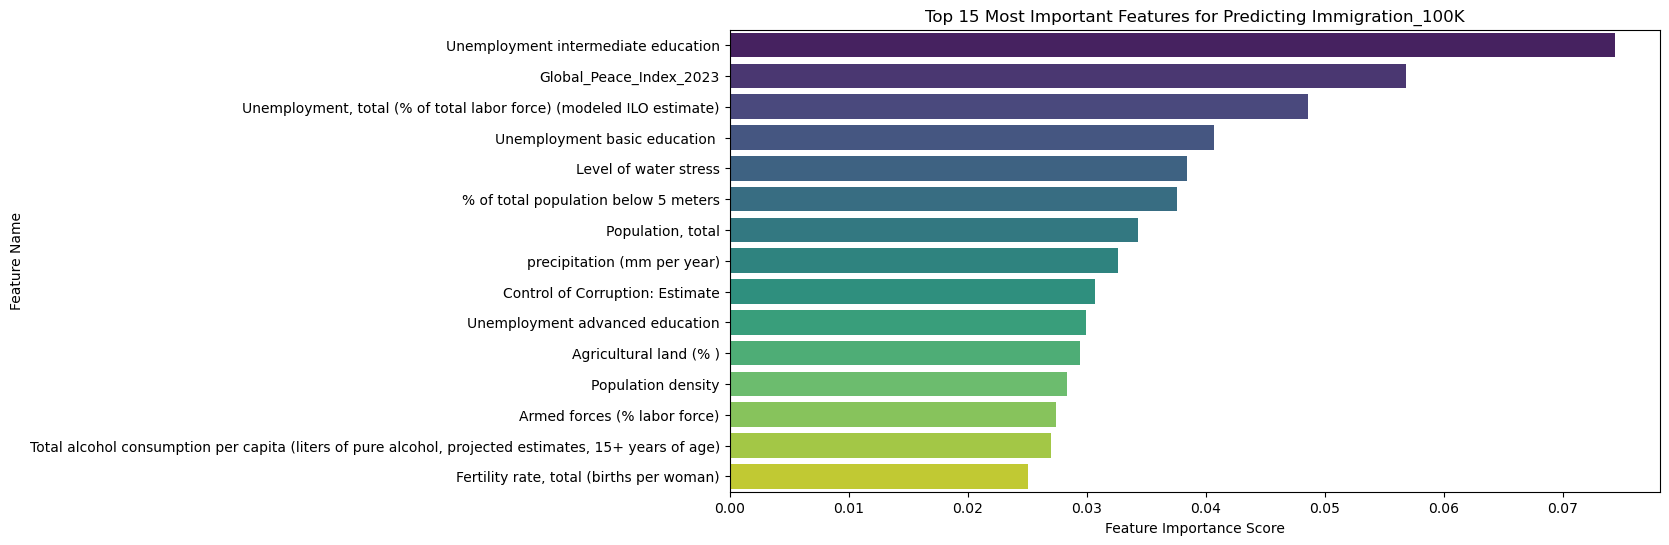

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top selected features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette="viridis")

plt.title("Top 15 Most Important Features for Predicting Immigration_100K")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.show()

### Heatmap of Correlation Between Selected Features

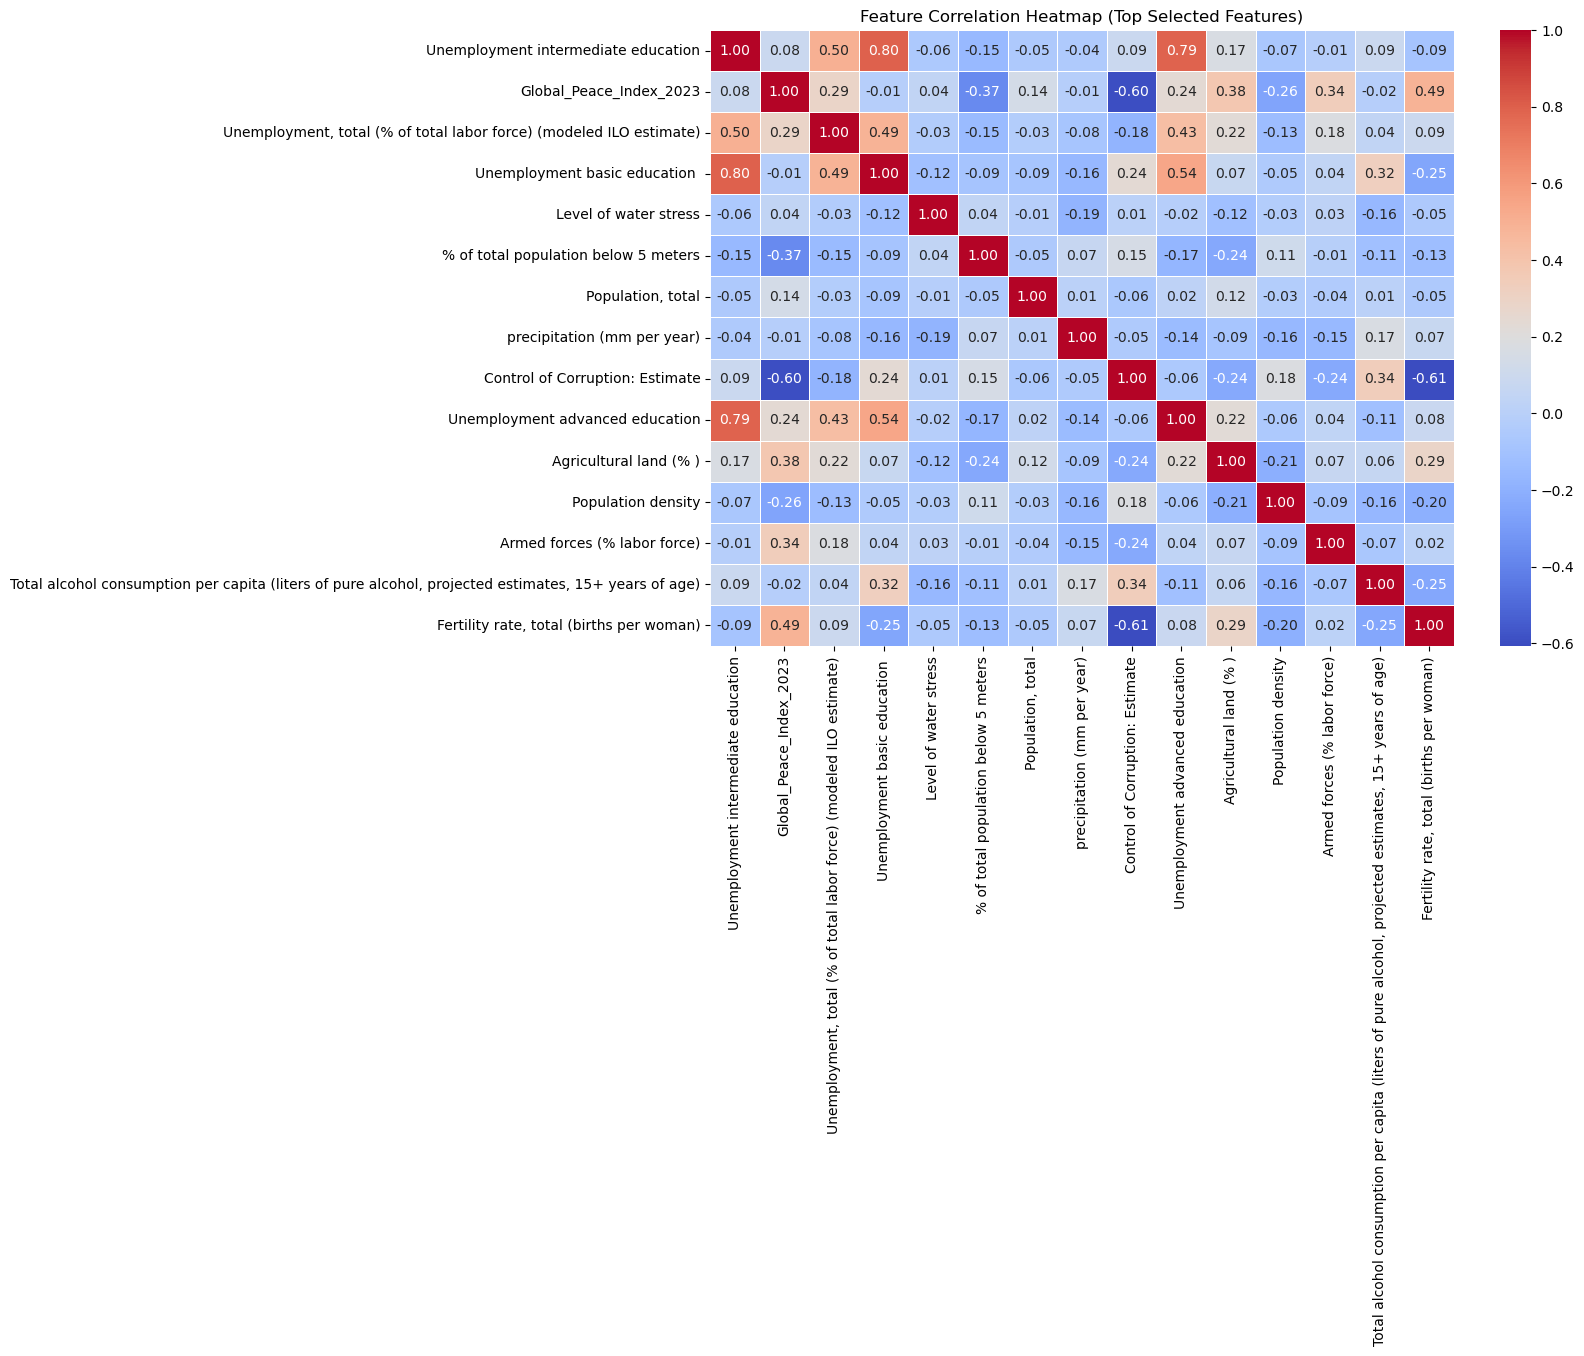

In [30]:
# Compute correlation matrix for top selected features
corr_matrix = X_train_selected.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Top Selected Features)")
plt.show()

### Feature Distribution of Top Features

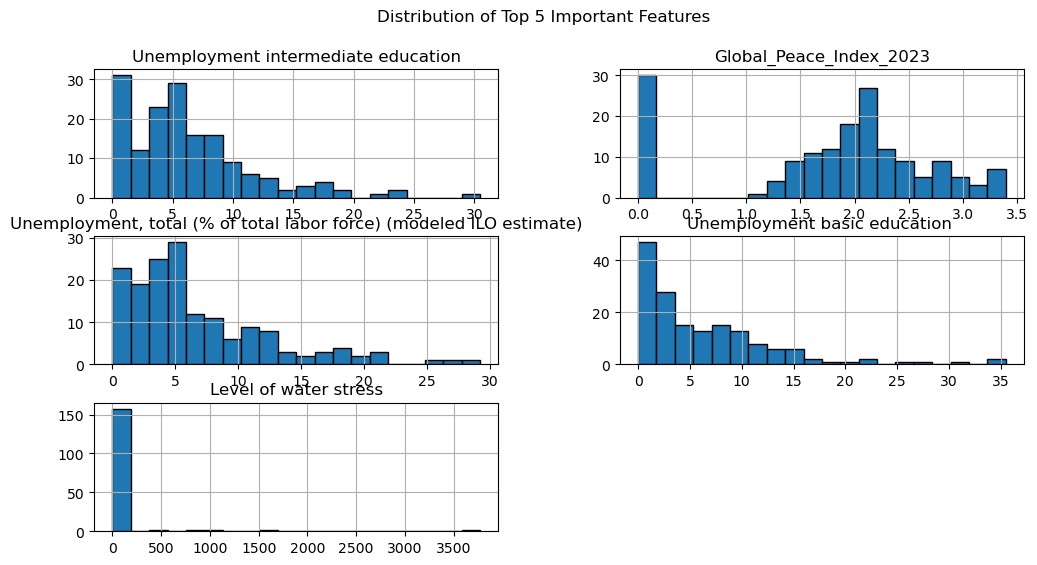

In [31]:
# Select top 5 features
top_5_features = feature_importances.head(5)['feature'].tolist()

# Plot distributions
X_train_selected[top_5_features].hist(figsize=(12, 6), bins=20, edgecolor='black')
plt.suptitle("Distribution of Top 5 Important Features")
plt.show()

- Hyperparameter Tuning for XGBoost <br>
Using GridSearchCV to optimize hyperparameters for XGBoost.

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Use best model
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


### Evaluate the Tuned Model

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred_tuned = best_xgb_model.predict(X_test_selected)

# Compute evaluation metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nFine-Tuned XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"R² Score: {r2_tuned:.4f}")


Fine-Tuned XGBoost Model Performance:
Mean Absolute Error (MAE): 0.39
Root Mean Squared Error (RMSE): 0.44
R² Score: 0.2135


Mean Absolute Error (MAE): 0.39
- The model’s predictions deviate by an average of 0.39 units from the actual immigration_100K values.
- A lower MAE is better, meaning the model makes relatively accurate predictions.
- Significance: The model is performing well in minimizing absolute errors.

Root Mean Squared Error (RMSE): 0.44
- The RMSE value of 0.44 indicates that the average error is slightly higher than MAE.
- RMSE gives more weight to large deviations, so this means a few large errors exist in the predictions.
Lower RMSE is better.
- Significance: The model does reasonably well but may still have some larger prediction errors.

R² Score: 0.2135
- An R² score of 0.2135 (21.35%) means the model explains only 21.35% of the variance in the immigration_100K data.
- A higher R² (closer to 1) is better.
- Since R² is quite low, this indicates that the model is not capturing much of the variance in the data.

A low R² suggests that:
- Some important predictors are missing from the dataset.
- Non-linear relationships exist that the model has not fully captured.
- Too much noise is present in the data.
- Significance: While the model has improved from earlier versions, it still needs more feature engineering or non-linear modeling techniques to enhance performance.

### Scatter Plot - Actual vs. Predicted

In [32]:
# Predict using the fine-tuned XGBoost model
y_pred_tuned = best_xgb_model.predict(X_test_selected)

# Calculate residuals (actual - predicted)
residuals = y_test - y_pred_tuned


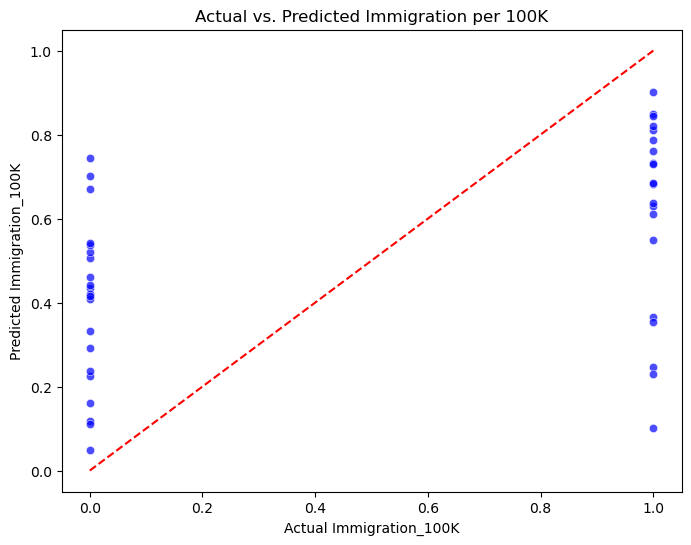

In [33]:
# Scatter plot: Actual vs. Predicted immigration values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.7, color='blue')

# Perfect Prediction Line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Titles and Labels
plt.title("Actual vs. Predicted Immigration per 100K")
plt.xlabel("Actual Immigration_100K")
plt.ylabel("Predicted Immigration_100K")

plt.show()

Explanation : Scatter Plot (Actual vs. Predicted)
- If points are close to the red line, the predictions are accurate.
- Deviations from the red line indicate prediction errors.

### Residual Plot

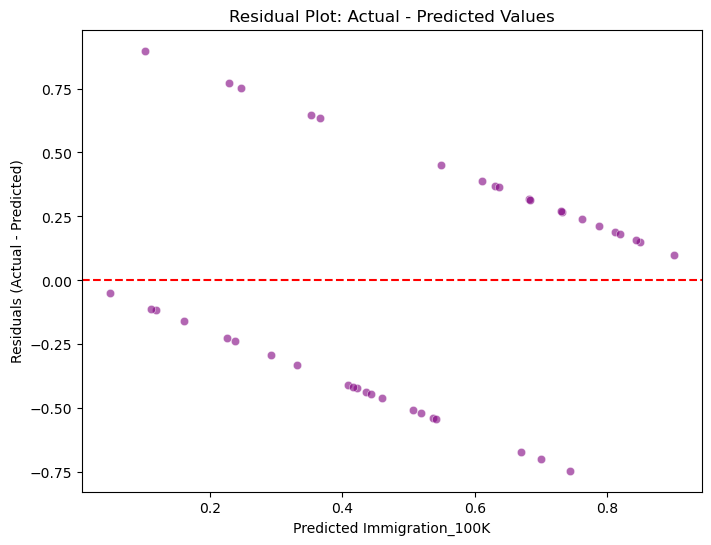

In [34]:
# Scatter plot: Residuals (errors)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_tuned, y=residuals, alpha=0.6, color='purple')

# Zero Error Line
plt.axhline(y=0, color='red', linestyle='--')

# Titles and Labels
plt.title("Residual Plot: Actual - Predicted Values")
plt.xlabel("Predicted Immigration_100K")
plt.ylabel("Residuals (Actual - Predicted)")

plt.show()

Explanation : Residual Plot (Actual - Predicted Errors)
- A random spread of residuals around 0 is ideal.
- If patterns exist, the model may be missing relationships in the data.

 ### Histogram of Residuals

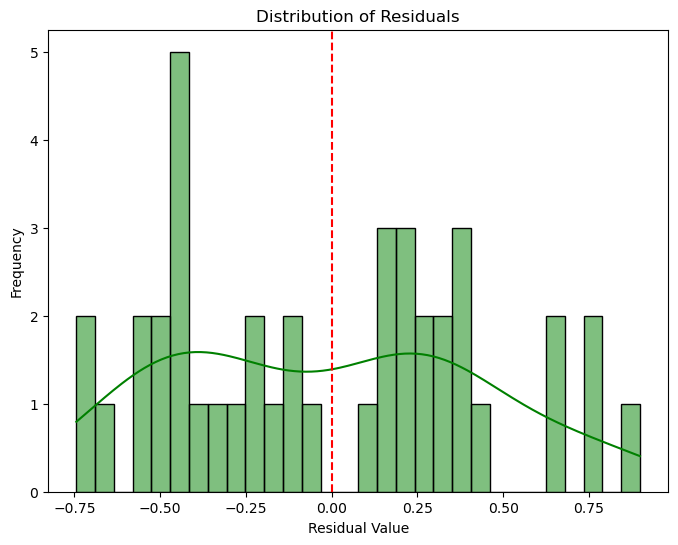

In [35]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='green')

# Zero Residual Line
plt.axvline(x=0, color='red', linestyle='--')

# Titles and Labels
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")

plt.show()